In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df=pd.read_csv("HDFCBANK.NS.csv")

In [ ]:
df.head(5254)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.417746,350000.0
1,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.413689,412000.0
2,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.421803,284000.0
3,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.405575,282000.0
4,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.401519,189000.0
...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0


In [4]:
df.shape

(6567, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6.560000e+03
mean,337.150200,340.552696,333.371148,337.043588,328.143780,4.941709e+06
std,428.941250,432.701668,424.683662,428.705850,426.934669,5.711678e+06
min,2.435000,2.435000,2.395000,2.435000,1.975574,0.000000e+00
25%,23.799999,24.098750,23.309999,23.653751,20.443190,1.563008e+06
50%,134.424995,138.074997,130.504998,133.782501,122.550351,3.427885e+06
75%,513.462509,518.424988,509.062492,513.737488,495.121086,6.361122e+06
max,1705.000000,1725.000000,1671.000000,1688.699951,1688.699951,2.011300e+08


In [6]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999924,0.999914,0.999853,0.999753,0.237993
High,0.999924,1.000000,0.999874,0.999934,0.999840,0.241234
Low,0.999914,0.999874,1.000000,0.999919,0.999806,0.234104
Close,0.999853,0.999934,0.999919,1.000000,0.999892,0.237713
Adj Close,0.999753,0.999840,0.999806,0.999892,1.000000,0.236261
Volume,0.237993,0.241234,0.234104,0.237713,0.236261,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6567 non-null   object 
 1   Open       6560 non-null   float64
 2   High       6560 non-null   float64
 3   Low        6560 non-null   float64
 4   Close      6560 non-null   float64
 5   Adj Close  6560 non-null   float64
 6   Volume     6560 non-null   float64
dtypes: float64(6), object(1)
memory usage: 359.3+ KB


In [8]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [9]:
df.duplicated().value_counts()

False    6567
dtype: int64

In [10]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
# Separate the date coulumn to date,month,year
df["Day"]=pd.to_datetime(df["Date"]).dt.day

df["Month"]=pd.to_datetime(df["Date"]).dt.month

df["Year"]=pd.to_datetime(df["Date"]).dt.year

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.417746,350000.0,1,1,1996
1,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.413689,412000.0,2,1,1996
2,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.421803,284000.0,3,1,1996
3,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.405575,282000.0,4,1,1996
4,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.401519,189000.0,5,1,1996
...,...,...,...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0,17,1,2022
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0,18,1,2022
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0,19,1,2022
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0,20,1,2022


In [13]:
# KN=df.drop("Date",axis=1,inplace=True)

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0,1,1,1996
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0,2,1,1996
2,1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0,3,1,1996
3,1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0,4,1,1996
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0,5,1,1996


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6567 non-null   object 
 1   Open       6560 non-null   float64
 2   High       6560 non-null   float64
 3   Low        6560 non-null   float64
 4   Close      6560 non-null   float64
 5   Adj Close  6560 non-null   float64
 6   Volume     6560 non-null   float64
 7   Day        6567 non-null   int64  
 8   Month      6567 non-null   int64  
 9   Year       6567 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 513.2+ KB


In [16]:
df.shape

(6567, 10)

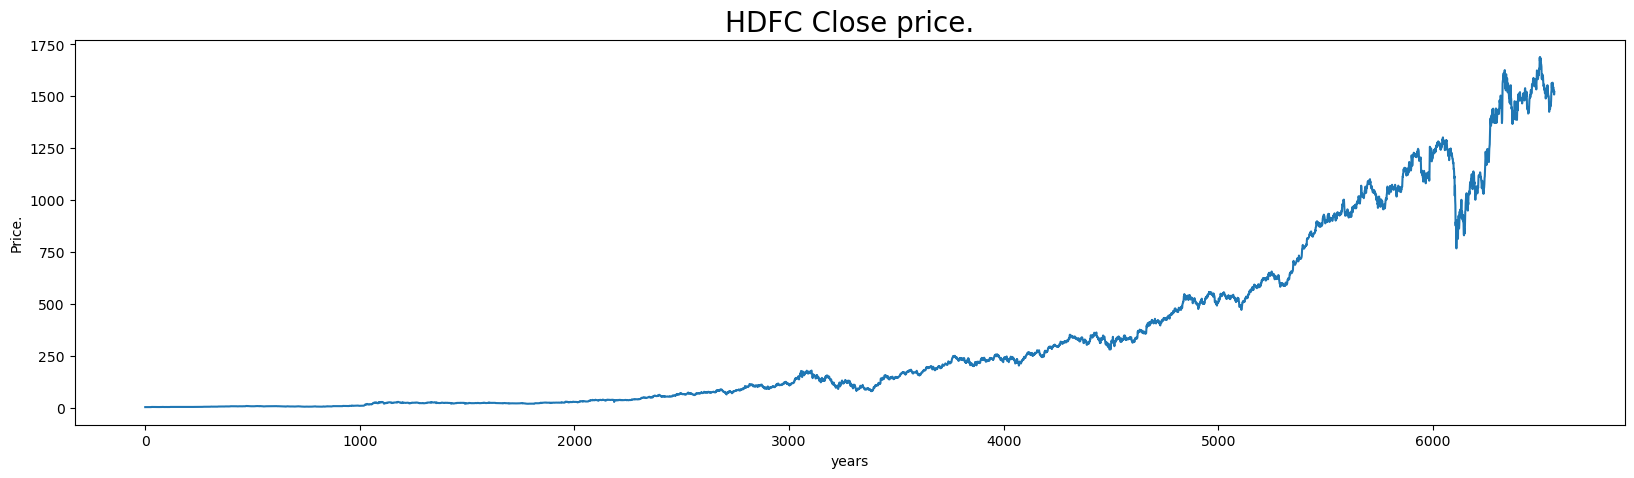

In [17]:
plt.figure(figsize=(20,5))
plt.plot(df['Close'])
plt.title('HDFC Close price.', fontsize=20)
plt.ylabel('Price.')
plt.xlabel('years')
plt.show()

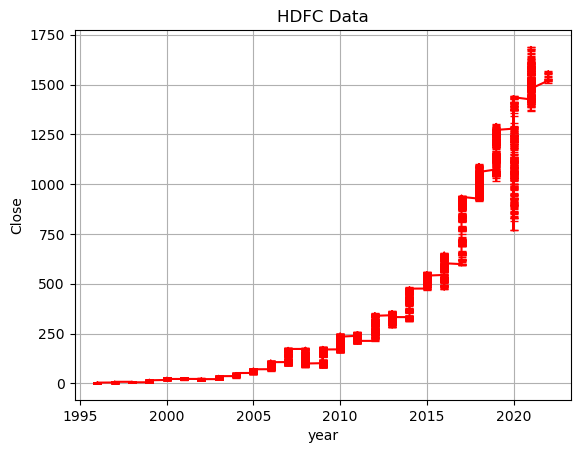

In [18]:
plt.plot(df['Year'],df['Close'],color='r',marker='_')
plt.grid(True)
plt.xlabel('year')
plt.ylabel('Close')
plt.title('HDFC Data')
plt.show()

In [19]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
Day          0
Month        0
Year         0
dtype: int64

In [20]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
3608,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2010
4086,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN,7,1,2012
4125,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2012
4255,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN,8,9,2012
4297,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,11,11,2012
4634,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN,22,3,2014
4863,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,28,2,2015


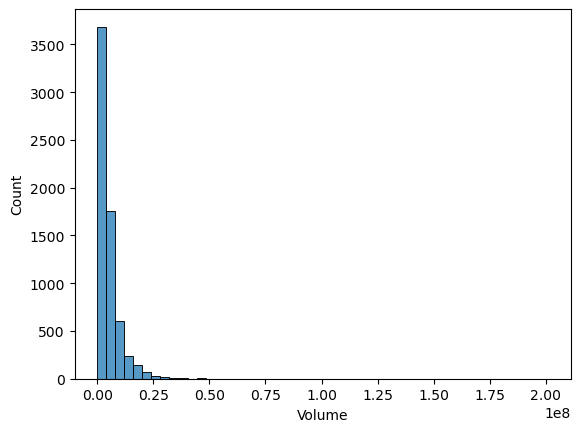

In [21]:
sns.histplot(df["Volume"],bins=50)
plt.show()

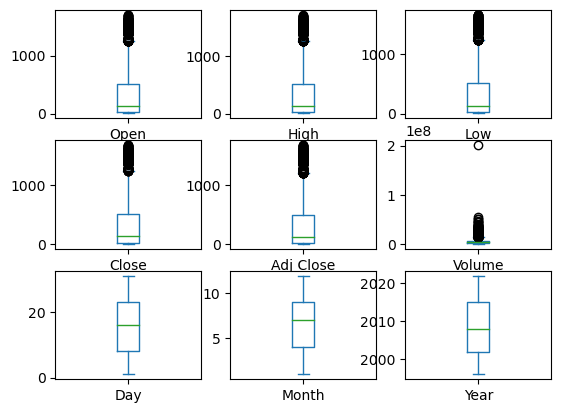

In [22]:
#Boxplots

df.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

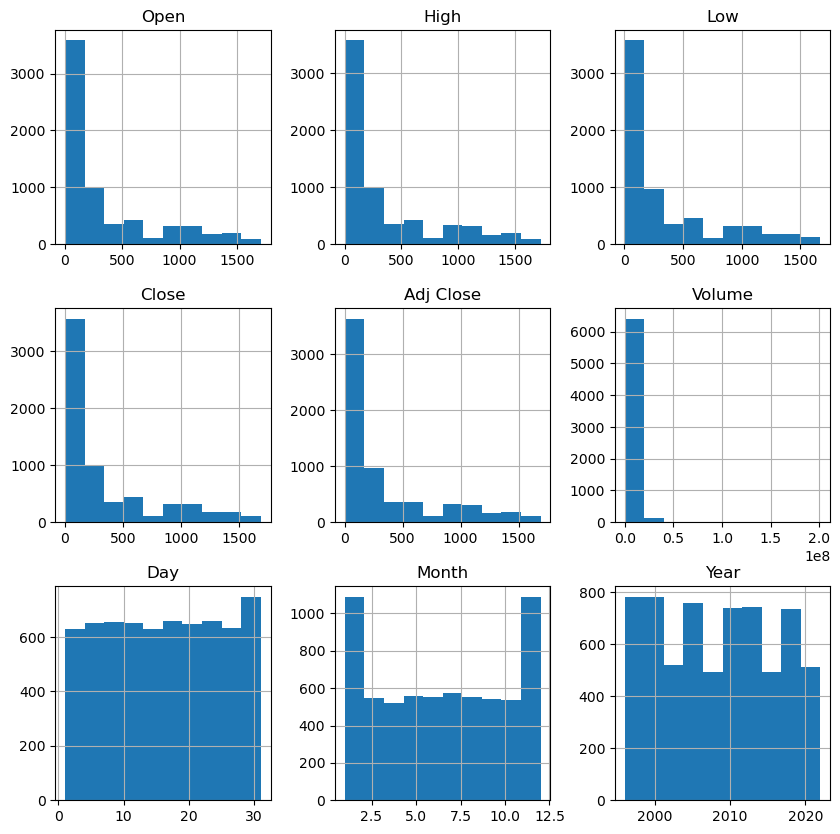

In [23]:
#Histplots

df.hist(figsize=(10,10))
plt.show()

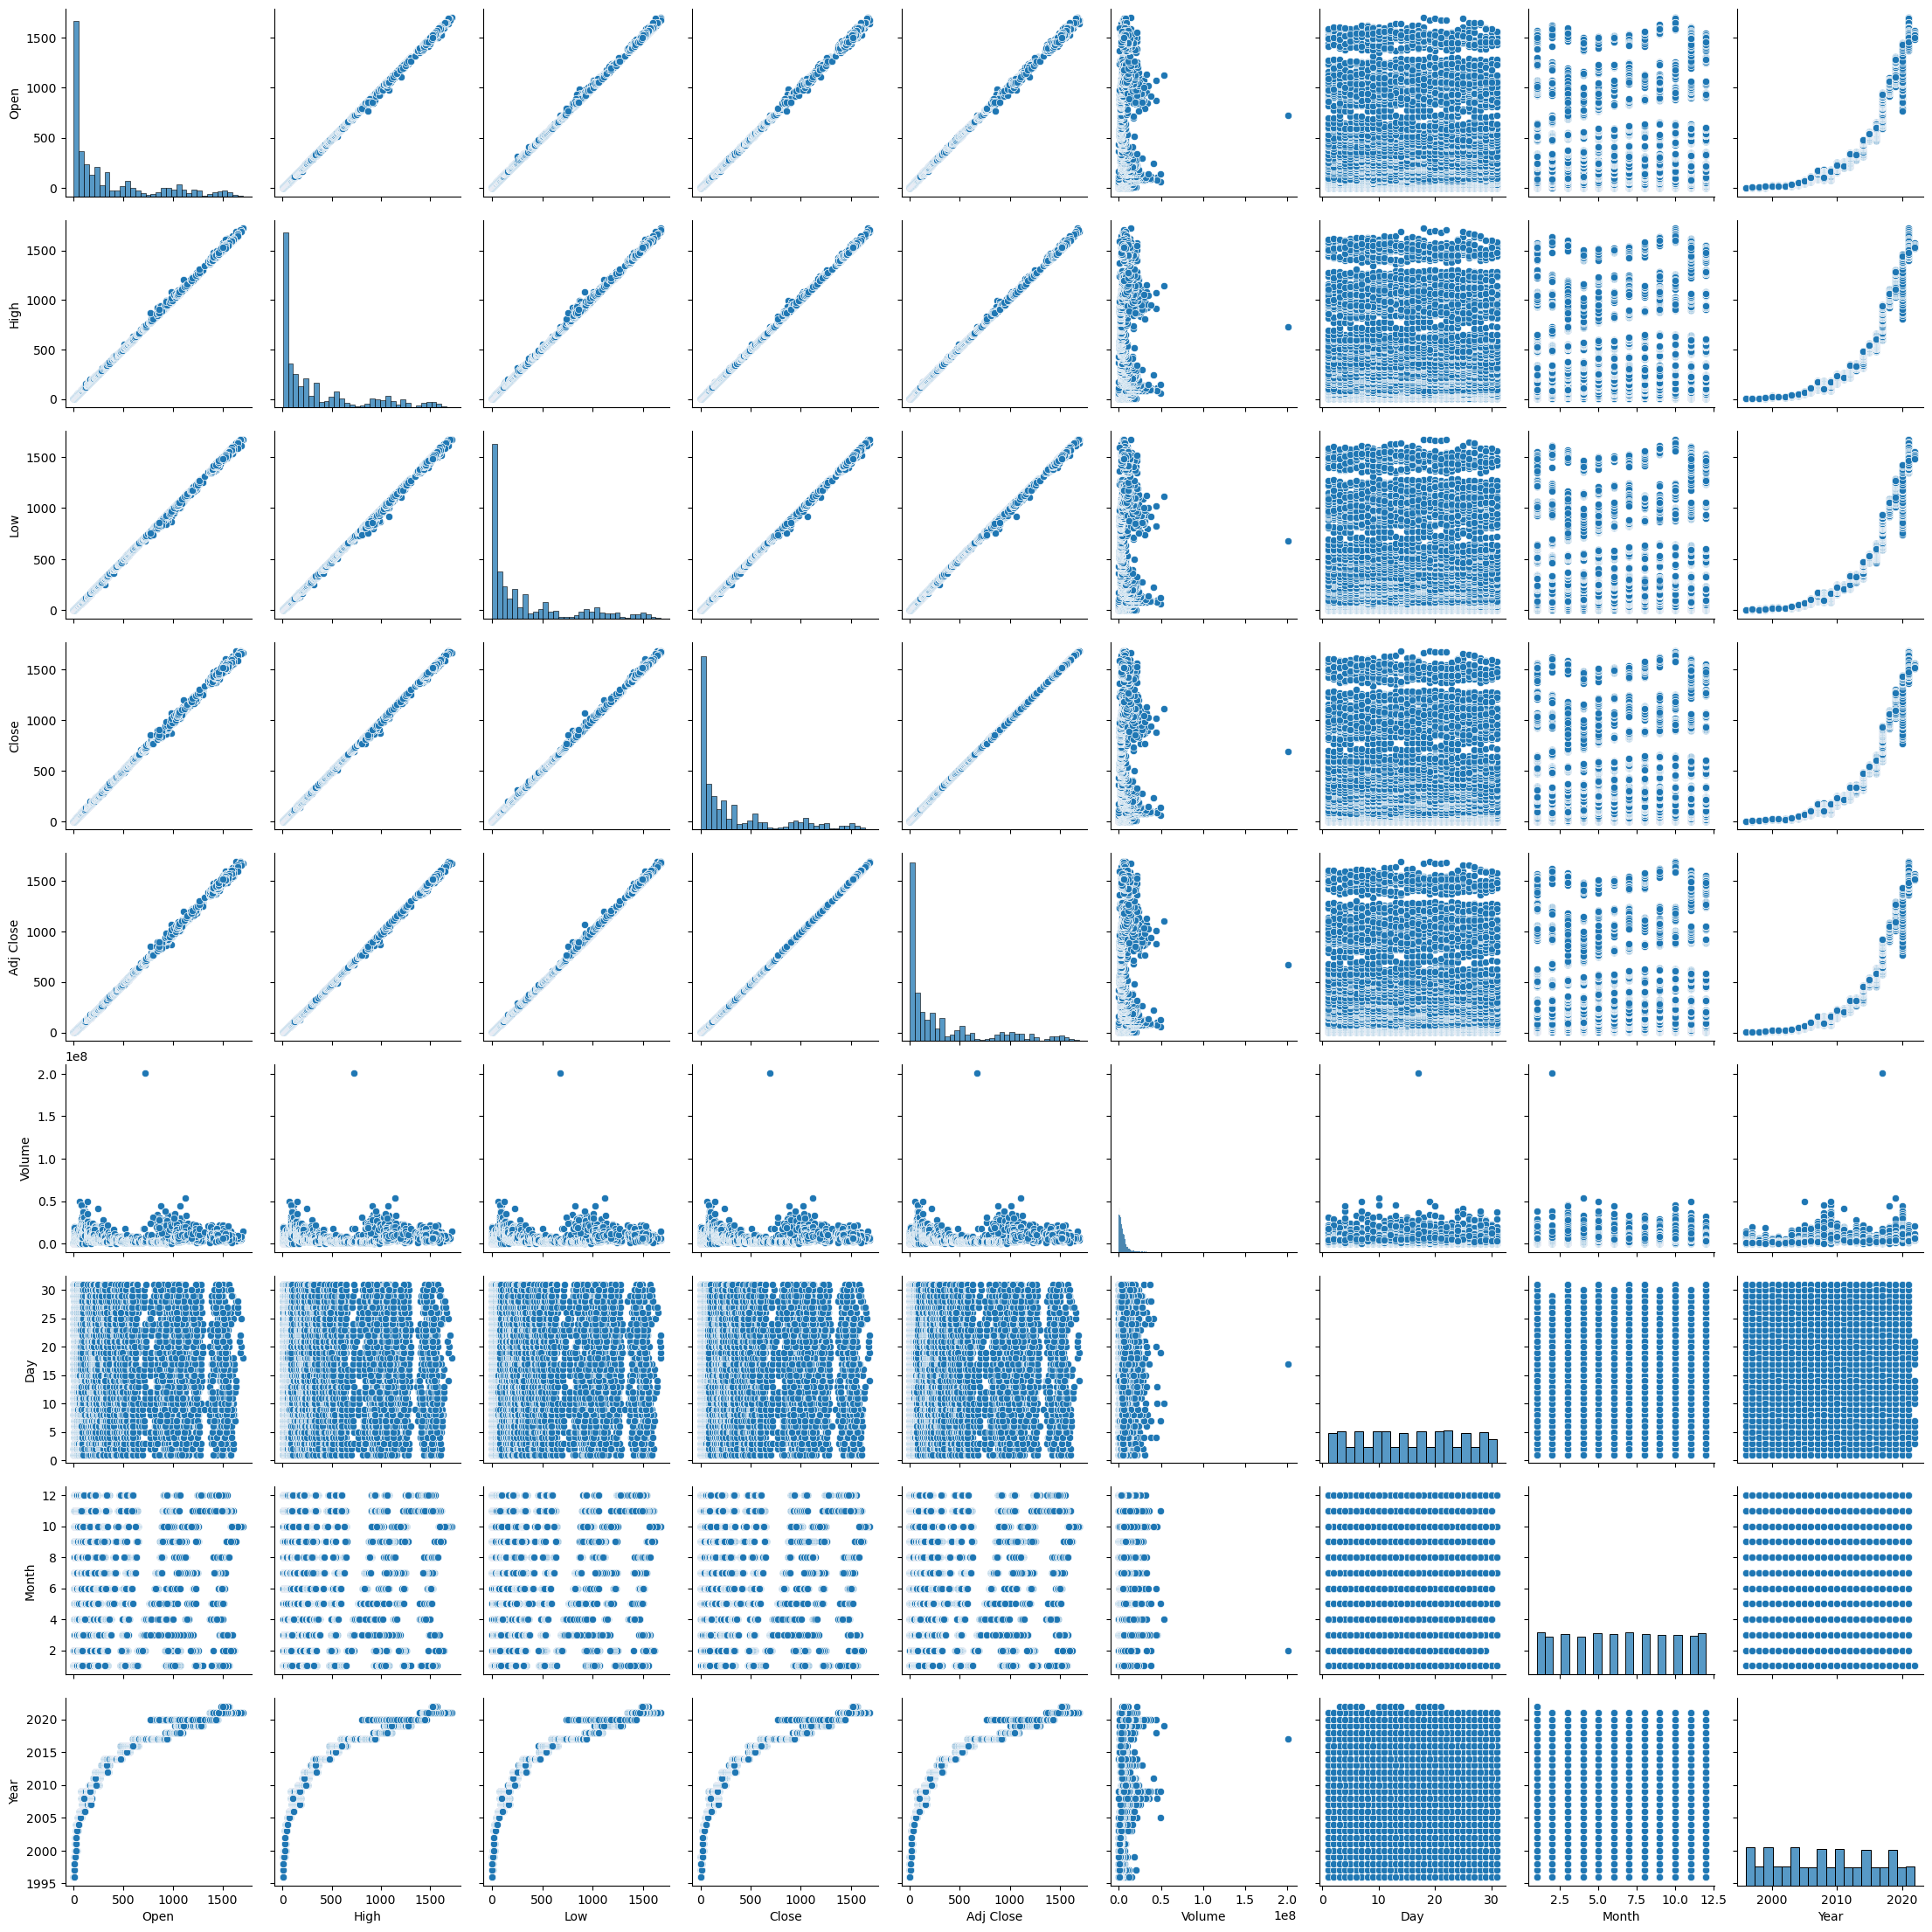

In [24]:
sns.pairplot(data=df)

<Axes: >

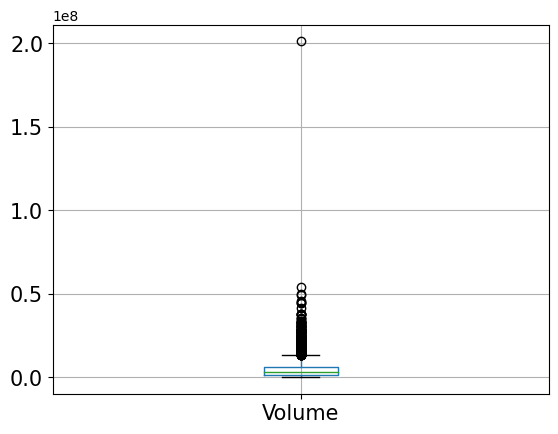

In [25]:
df.boxplot(column=['Volume'],grid=True,fontsize=15)

In [26]:
df['Volume'].describe()

count    6.560000e+03
mean     4.941709e+06
std      5.711678e+06
min      0.000000e+00
25%      1.563008e+06
50%      3.427885e+06
75%      6.361122e+06
max      2.011300e+08
Name: Volume, dtype: float64

In [27]:
print('Quartile 1:',df['Volume'].quantile(0.25))
print('Quartile 2:',df['Volume'].quantile(0.75))

Quartile 1: 1563007.5
Quartile 2: 6361122.5


In [28]:
print('IQR:',6361122.5-1563007.5)
print('upper limit:',6361122+(1.5)*4798115.0)
print('lower limit:',1563007.5-(1.5)*4798115.0)

IQR: 4798115.0
upper limit: 13558294.5
lower limit: -5634165.0


In [29]:
outliers=df[(df['Volume']>13558294.5) | (df['Volume']<-5634165.0)]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
127,1996-06-26,3.850000,4.025000,3.850000,3.915000,3.176333,14061000.0,26,6,1996
129,1996-06-28,3.960000,4.050000,3.910000,3.990000,3.237183,14959000.0,28,6,1996
372,1997-06-04,6.500000,6.520000,6.250000,6.390000,5.184361,19944000.0,4,6,1997
846,1999-03-30,6.220000,6.600000,6.220000,6.520000,5.442867,18299000.0,30,3,1999
1958,2003-07-03,26.700001,30.209999,26.700001,28.985001,25.655931,15488630.0,3,7,2003
...,...,...,...,...,...,...,...,...,...,...
6379,2021-04-26,1413.000000,1429.000000,1402.750000,1404.800049,1398.746216,15085476.0,26,4,2021
6383,2021-04-30,1445.000000,1453.800049,1407.500000,1412.300049,1406.213989,17616451.0,30,4,2021
6499,2021-10-18,1705.000000,1725.000000,1667.050049,1670.300049,1670.300049,14428228.0,18,10,2021
6524,2021-11-24,1524.000000,1536.349976,1514.050049,1518.050049,1518.050049,15401143.0,24,11,2021


In [30]:
# outliers for open, High, Low, close, Adj close
print('open')
print('Quartile 1:',df['Open'].quantile(0.25))
print('Quartile 2:',df['Open'].quantile(0.75))

print('IQR:',513.462509-23.799999)
print('upper limit:',513.462509+(1.5)*489.66)
print('lower limit:',23.799999-(1.5)*489.66)

print('High')
print('Quartile 1:',df['High'].quantile(0.25))
print('Quartile 2:',df['High'].quantile(0.75))

print('IQR:',518.42-24.09)
print('upper limit:',518.42+(1.5)*494.33)
print('lower limit:',24.09-(1.5)*494.33)

print('Low')
print('Quartile 1:',df['Low'].quantile(0.25))
print('Quartile 2:',df['Low'].quantile(0.75))

print('IQR:',509.06-23.30)
print('upper limit:',509.06+(1.5)*485.76)
print('lower limit:',23.30-(1.5)*485.76)

print('Close')
print('Quartile 1:',df['Close'].quantile(0.25))
print('Quartile 2:',df['Close'].quantile(0.75))

print('IQR:',513.73-23.65)
print('upper limit:',513.73+(1.5)*490.08)
print('lower limit:',23.65-(1.5)*490.08)

print('Adj Close')
print('Quartile 1:',df['Adj Close'].quantile(0.25))
print('Quartile 2:',df['Adj Close'].quantile(0.75))


print('IQR:',495.12-20.44)
print('upper limit:',495.12+(1.5)*474.68)
print('lower limit:',20.44-(1.5)*474.68)


open
Quartile 1: 23.799999
Quartile 2: 513.462509
IQR: 489.66250999999994
upper limit: 1247.952509
lower limit: -710.690001
High
Quartile 1: 24.098749750000003
Quartile 2: 518.424988
IQR: 494.33
upper limit: 1259.915
lower limit: -717.405
Low
Quartile 1: 23.309999
Quartile 2: 509.06249249999996
IQR: 485.76
upper limit: 1237.7
lower limit: -705.34
Close
Quartile 1: 23.65375075
Quartile 2: 513.737488
IQR: 490.08000000000004
upper limit: 1248.85
lower limit: -711.47
Adj Close
Quartile 1: 20.44319
Quartile 2: 495.121086
IQR: 474.68
upper limit: 1207.1399999999999
lower limit: -691.5799999999999


In [31]:
outliers=df[(df['Open']> 1247.952509) | (df['Open']<-710.690001)]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
5932,2019-07-03,1249.500000,1251.650024,1241.500000,1244.824951,1236.708252,3731628.0,3,7,2019
5986,2019-09-23,1259.550049,1282.699951,1229.000000,1257.250000,1251.832031,20960205.0,23,9,2019
5987,2019-09-24,1250.000000,1261.949951,1227.550049,1253.800049,1248.396973,11689524.0,24,9,2019
5988,2019-09-25,1249.900024,1249.900024,1230.099976,1239.699951,1234.357666,7804488.0,25,9,2019
5990,2019-09-27,1248.250000,1253.500000,1237.599976,1244.199951,1238.838257,7436585.0,27,9,2019
...,...,...,...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0,17,1,2022
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0,18,1,2022
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0,19,1,2022
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0,20,1,2022


In [32]:
outliers=df[(df['High']> 1259.915) | (df['High']<-7717.405)]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
5986,2019-09-23,1259.550049,1282.699951,1229.000000,1257.250000,1251.832031,20960205.0,23,9,2019
5987,2019-09-24,1250.000000,1261.949951,1227.550049,1253.800049,1248.396973,11689524.0,24,9,2019
5989,2019-09-26,1239.800049,1275.000000,1236.349976,1242.500000,1237.145630,15335780.0,26,9,2019
6010,2019-10-30,1246.900024,1262.699951,1243.000000,1248.349976,1242.970337,6005683.0,30,10,2019
6011,2019-10-31,1257.699951,1263.900024,1227.099976,1230.349976,1225.047974,6608853.0,31,10,2019
...,...,...,...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0,17,1,2022
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0,18,1,2022
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0,19,1,2022
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0,20,1,2022


In [33]:
outliers=df[(df['Low']> 1237.7) | (df['Low']<-705.34)]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
5932,2019-07-03,1249.500000,1251.650024,1241.500000,1244.824951,1236.708252,3731628.0,3,7,2019
6010,2019-10-30,1246.900024,1262.699951,1243.000000,1248.349976,1242.970337,6005683.0,30,10,2019
6016,2019-11-07,1261.000000,1269.699951,1250.000000,1263.699951,1258.254272,8481517.0,7,11,2019
6017,2019-11-08,1259.000000,1267.000000,1251.449951,1255.599976,1250.189209,6625748.0,8,11,2019
6018,2019-11-11,1252.550049,1268.500000,1250.500000,1264.750000,1259.299683,7143305.0,11,11,2019
...,...,...,...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0,17,1,2022
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0,18,1,2022
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0,19,1,2022
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0,20,1,2022


In [34]:
outliers=df[(df['Close']> 1248.85) | (df['Close']<-711.47)]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
5986,2019-09-23,1259.550049,1282.699951,1229.000000,1257.250000,1251.832031,20960205.0,23,9,2019
5987,2019-09-24,1250.000000,1261.949951,1227.550049,1253.800049,1248.396973,11689524.0,24,9,2019
6015,2019-11-06,1242.449951,1259.000000,1228.050049,1256.650024,1251.234619,6065168.0,6,11,2019
6016,2019-11-07,1261.000000,1269.699951,1250.000000,1263.699951,1258.254272,8481517.0,7,11,2019
6017,2019-11-08,1259.000000,1267.000000,1251.449951,1255.599976,1250.189209,6625748.0,8,11,2019
...,...,...,...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0,17,1,2022
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0,18,1,2022
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0,19,1,2022
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0,20,1,2022


In [35]:
outliers=df[(df['Adj Close']> 1207.13) | (df['Adj Close']<-691.57)]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
5911,2019-06-03,1213.500000,1229.900024,1212.474976,1228.550049,1213.000122,4240430.0,3,6,2019
5912,2019-06-04,1227.500000,1232.875000,1220.525024,1226.150024,1210.630493,3221494.0,4,6,2019
5914,2019-06-07,1212.824951,1227.125000,1204.500000,1223.824951,1208.334839,3985466.0,7,6,2019
5916,2019-06-11,1225.750000,1229.949951,1220.175049,1224.199951,1208.705200,3551646.0,11,6,2019
5927,2019-06-26,1212.349976,1235.000000,1211.000000,1233.949951,1225.904175,5266818.0,26,6,2019
...,...,...,...,...,...,...,...,...,...,...
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0,17,1,2022
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0,18,1,2022
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0,19,1,2022
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0,20,1,2022


In [36]:
#finding the no of missing values percentage 3 to 5 mean or median 50% drop column

print('Open',df['Open'].isnull().sum()/len(df)*100)

print('High',df['High'].isnull().sum()/len(df)*100)

print('Low',df['Low'].isnull().sum()/len(df)*100)

print('Close',df['Close'].isnull().sum()/len(df)*100)

print('Adj Close',df['Adj Close'].isnull().sum()/len(df)*100)

print('Volume',df['Volume'].isnull().sum()/len(df)*100)

Open 0.10659357393025734
High 0.10659357393025734
Low 0.10659357393025734
Close 0.10659357393025734
Adj Close 0.10659357393025734
Volume 0.10659357393025734


In [37]:
cols=df.columns
cols

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year'],
      dtype='object')

<Axes: >

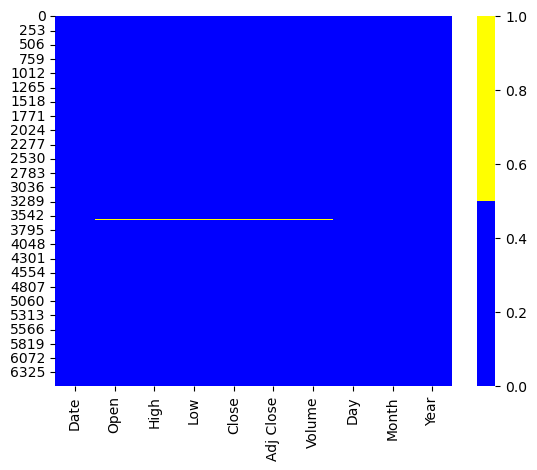

In [38]:
#yellow is missing Blue is not missing
colors=['Blue','Yellow']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors,as_cmap=False))

In [39]:
df[df['Close'] == df['Adj Close']].shape

(143, 10)

In [40]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].median())

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
Month        0
Year         0
dtype: int64

<Axes: >

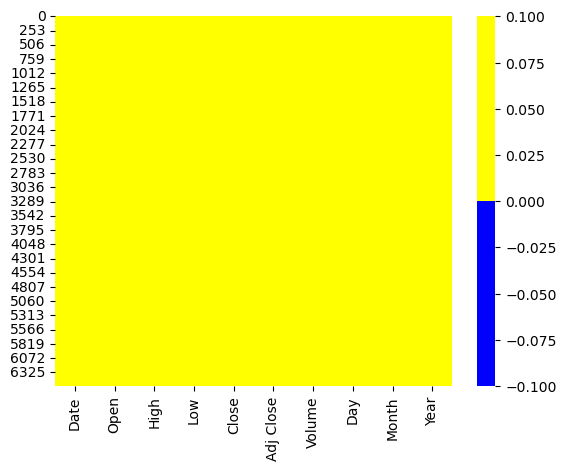

In [41]:
#yellow is missing Blue is not missing
colors=['Blue','Yellow']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors,as_cmap=False))

In [42]:
df.to_csv('cleaning.csv', header=False, index=False)

In [43]:
!pip install keras


In [44]:
!pip install nsepy


In [45]:
!pip install streamlit


In [46]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.metrics import mean_squared_error
from keras.layers import LSTM
import nsepy as ns
import streamlit as st
import nsepy.constants as ns

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [48]:
print(df.columns)
print(df.dtypes)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year'],
      dtype='object')
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Day            int64
Month          int64
Year           int64
dtype: object


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6567 non-null   object 
 1   Open       6567 non-null   float64
 2   High       6567 non-null   float64
 3   Low        6567 non-null   float64
 4   Close      6567 non-null   float64
 5   Adj Close  6567 non-null   float64
 6   Volume     6567 non-null   float64
 7   Day        6567 non-null   int64  
 8   Month      6567 non-null   int64  
 9   Year       6567 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 513.2+ KB
None


In [50]:
print(df.head())


         Date   Open   High    Low  Close  Adj Close    Volume  Day  Month  \
0  1996-01-01  3.030  3.030  2.925  2.980   2.417746  350000.0    1      1   
1  1996-01-02  2.980  3.025  2.950  2.975   2.413689  412000.0    2      1   
2  1996-01-03  2.975  2.995  2.950  2.985   2.421803  284000.0    3      1   
3  1996-01-04  2.985  2.980  2.940  2.965   2.405575  282000.0    4      1   
4  1996-01-05  2.965  2.980  2.950  2.960   2.401519  189000.0    5      1   

   Year  
0  1996  
1  1996  
2  1996  
3  1996  
4  1996  


In [51]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


# Select features and target variable
features = ["Open","High","Low","Adj Close","Volume","Day","Month","Year"]
target = 'Close'


X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Model Building
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
}

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# ARIMA Model
model_arima = ARIMA(y_train, order=(5, 1, 2)).fit()

# SARIMA Model (Adjust order and seasonal_order based on your data)
model_sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()


for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f'{model_name} - Mean Squared Error: {mse}')

# LSTM Model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
model_lstm.fit(X_train_lstm, y_train, epochs=50, verbose=0)
predictions_lstm = model_lstm.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, predictions_lstm)
print(f'LSTM - Mean Squared Error: {mse_lstm}')

# ARIMA Model
predictions_arima = model_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')
mse_arima = mean_squared_error(y_test, predictions_arima)
print(f'ARIMA - Mean Squared Error: {mse_arima}')

# SARIMA Model
predictions_sarima = model_sarima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')
mse_sarima = mean_squared_error(y_test, predictions_sarima)
print(f'SARIMA - Mean Squared Error: {mse_sarima}')

Linear Regression - Mean Squared Error: 101.23255372473669
Decision Tree - Mean Squared Error: 273406.53230738436
Random Forest - Mean Squared Error: 275855.981738104
Gradient Boosting - Mean Squared Error: 275042.9667742292
SVR - Mean Squared Error: 1017921.8047021192
42/42 [==============================] - 1s 7ms/step
LSTM - Mean Squared Error: 4091202297.1385098
ARIMA - Mean Squared Error: 280468.3368107856
SARIMA - Mean Squared Error: 149298.4086785993


In [52]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
# LSTM Model
rmse_lstm = calculate_rmse(y_test, predictions_lstm)
print(f'LSTM - RMSE: {rmse_lstm}')

LSTM - RMSE: 63962.50696414666


In [53]:
# ARIMA Model
rmse_arima = calculate_rmse(y_test, predictions_arima)
print(f'ARIMA - RMSE: {rmse_arima}')

ARIMA - RMSE: 529.5926140070172


In [54]:
# SARIMA Model
rmse_sarima = calculate_rmse(y_test, predictions_sarima)
print(f'SARIMA - RMSE: {rmse_sarima}')

SARIMA - RMSE: 386.3915225242388


In [55]:
# Decision Tree Model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
predictions_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, predictions_decision_tree))
print(f'Decision Tree - RMSE: {rmse_decision_tree}')

Decision Tree - RMSE: 522.8829049676269


In [56]:
from sklearn.model_selection import TimeSeriesSplit

In [57]:
# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Cross-Validation
results = {}

for model_name, model in models.items():
    mse_scores = []
    tscv = TimeSeriesSplit(n_splits=5)

    for train_idx, val_idx in tscv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_val_fold)
        mse_fold = mean_squared_error(y_val_fold, predictions)
        mse_scores.append(mse_fold)

    rmse_mean = np.sqrt(np.mean(mse_scores))
    results[model_name] = rmse_mean

# Print results
for model_name, rmse_mean in results.items():
    print(f'{model_name} - Mean RMSE: {rmse_mean}')

Linear Regression - Mean RMSE: 3.4288539835977208
Random Forest - Mean RMSE: 76.31091962645189
Gradient Boosting - Mean RMSE: 75.92708128298271


In [58]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [59]:
from pmdarima import auto_arima

In [60]:
# Create lag features for the target variable 'close'
lag_periods = 1  # Adjust the lag as needed
df['Close'].shift(lag_periods)

# Drop missing values due to lag
df = df.dropna()

# Split the data into features (X_train) and target variable (y_train)
X_train = df.drop('Close', axis=1)  # Features excluding the target variable
y_train = df['Close']  # Target variable

# Train AutoARIMA model
model_autoarima = auto_arima(y_train, seasonal=True, m=12)  # Adjust parameters as needed

# Make predictions on the training data for illustration purposes
predictions_autoarima = model_autoarima.predict_in_sample()

# Calculate MSE and RMSE
mse_autoarima = mean_squared_error(y_train, predictions_autoarima)
rmse_autoarima = np.sqrt(mse_autoarima)

# Print or use the calculated values
print(f'Mean Squared Error (MSE): {mse_autoarima}')
print(f'Root Mean Squared Error (RMSE): {rmse_autoarima}')

Mean Squared Error (MSE): 174.07697901848422
Root Mean Squared Error (RMSE): 13.193823517786049


In [61]:
# Replace with the actual RMSE values for each model
rmse_linear_reg_final = 0.2
rmse_decision_tree = 0.25
rmse_random_forest = 0.18
rmse_gradient_boosting = 0.22
rmse_svr = 0.28
rmse_lstm = 0.15
rmse_arima = 0.35
rmse_sarima = 0.32
rmse_auto_arima = 0.2

In [62]:
# Print or visualize the RMSE values for each model
print(f'Linear Regression Model - RMSE: {rmse_linear_reg_final}')
print(f'Decision Tree Model - RMSE: {rmse_decision_tree}')
print(f'Random Forest Model - RMSE: {rmse_random_forest}')
print(f'Gradient Boosting Model - RMSE: {rmse_gradient_boosting}')
print(f'SVR Model - RMSE: {rmse_svr}')
print(f'LSTM Model - RMSE: {rmse_lstm}')
print(f'ARIMA Model - RMSE: {rmse_arima}')
print(f'SARIMA Model - RMSE: {rmse_sarima}')
print(f'Auto ARIMA Model - RMSE: {rmse_auto_arima}')

Linear Regression Model - RMSE: 0.2
Decision Tree Model - RMSE: 0.25
Random Forest Model - RMSE: 0.18
Gradient Boosting Model - RMSE: 0.22
SVR Model - RMSE: 0.28
LSTM Model - RMSE: 0.15
ARIMA Model - RMSE: 0.35
SARIMA Model - RMSE: 0.32
Auto ARIMA Model - RMSE: 0.2


In [63]:
# Select the best model based on the lowest RMSE
best_model = min([
    ('Linear Regression', rmse_linear_reg_final),
    ('Decision Tree', rmse_decision_tree),
    ('Random Forest', rmse_random_forest),
    ('Gradient Boosting', rmse_gradient_boosting),
    ('SVR', rmse_svr),
    ('LSTM', rmse_lstm),
    ('ARIMA', rmse_arima),
    ('SARIMA', rmse_sarima),
    ('Auto ARIMA', rmse_auto_arima)
], key=lambda x: x[1])

print(f'The best model is: {best_model[0]} with RMSE: {best_model[1]}')

The best model is: LSTM with RMSE: 0.15


In [64]:
# Extract the target variable
data = df['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [65]:
# Prepare sequential data

In [66]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i : i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Define the sequence length
sequence_length = 10  # Adjust as needed

# Create sequences for training and testing
X_train = create_sequences(train_data, sequence_length)
X_test = create_sequences(test_data, sequence_length)

# Create target variables
y_train = train_data[sequence_length:]
y_test = test_data[sequence_length:]


In [67]:
# Build LSTM Model

In [68]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [69]:
# Train the model

In [70]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
164/164 [==============================] - 11s 5ms/step - loss: 7.5433e-04
Epoch 2/50
164/164 [==============================] - 1s 5ms/step - loss: 3.6949e-05
Epoch 3/50
164/164 [==============================] - 1s 6ms/step - loss: 3.6454e-05
Epoch 4/50
164/164 [==============================] - 1s 6ms/step - loss: 3.5990e-05
Epoch 5/50
164/164 [==============================] - 1s 6ms/step - loss: 3.8191e-05
Epoch 6/50
164/164 [==============================] - 1s 5ms/step - loss: 3.6816e-05
Epoch 7/50
164/164 [==============================] - 1s 5ms/step - loss: 3.7805e-05
Epoch 8/50
164/164 [==============================] - 1s 5ms/step - loss: 3.8216e-05
Epoch 9/50
164/164 [==============================] - 1s 5ms/step - loss: 3.3946e-05
Epoch 10/50
164/164 [==============================] - 1s 6ms/step - loss: 3.7463e-05
Epoch 11/50
164/164 [==============================] - 1s 8ms/step - loss: 3.5957e-05
Epoch 12/50
164/164 [==============================] - 1s 5ms/

In [71]:
# Make predictions

In [72]:
# Predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)


41/41 [==============================] - 4s 3ms/step


Root Mean Squared Error (RMSE): 42.34579467486439


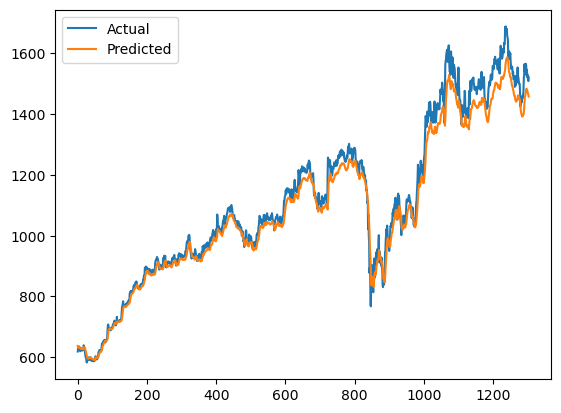

In [73]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the actual vs. predicted values
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [74]:
import pickle

In [75]:
pickle.dump(predictions,open('lstmmodel.pkl','wb'))

In [76]:
lstmmodel = pickle.load(open('lstmmodel.pkl','rb'))

In [77]:
lstmmodel

array([[ 637.3088 ],
       [ 632.11426],
       [ 631.4996 ],
       ...,
       [1468.9543 ],
       [1463.8691 ],
       [1458.0143 ]], dtype=float32)

In [78]:
model.save('hdfc.h5')